In [4]:
import intake
from easygems import healpix as egh
import matplotlib.pyplot as plt
import warnings
import xarray as xr
from pathlib import Path
import healpy as hp
import pandas as pd

In [17]:
path_metrics = f"/g/data/nf33/cb4968/metrics/observations/IMERG/doc_metrics/" 
file_area_frac = "area_fraction/IMERG/area_fraction_IMERG_3hrly_100-149_-13-13_3600x1800_2020-04_2021-03.nc"
file_mean_area = "mean_area/IMERG/mean_area_IMERG_3hrly_100-149_-13-13_3600x1800_2020-04_2021-03.nc"

In [54]:
# Area fraction and mean area
area_frac = xr.open_dataset(f"{path_metrics}/{file_area_frac}")
mean_area = xr.open_dataset(f"{path_metrics}/{file_mean_area}")

# Select percentile
per = 95
area_frac = area_frac[f"area_fraction_{per}_thres_pr_percentiles_{per}"]
mean_area = mean_area[f"mean_area_thres_pr_percentiles_{per}"]

# Mean
area_frac_mean = area_frac.mean()
mean_area_mean = mean_area.mean()

Text(0.0, 1.0, 'Object-based DOC metrics')

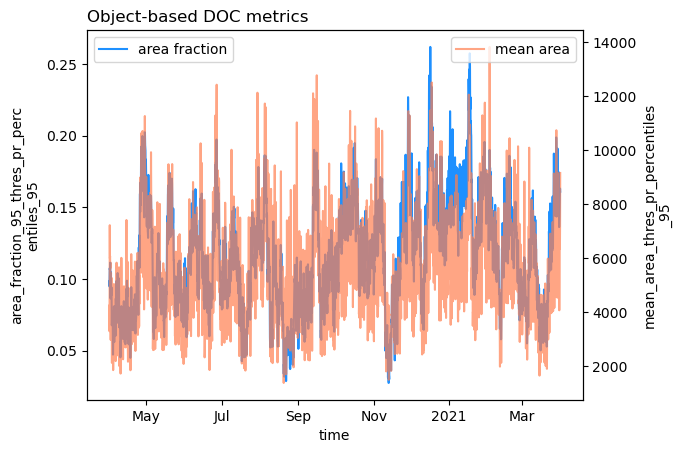

In [63]:
# Time series of metrics
fig, ax = plt.subplots()
area_frac.plot(ax = ax, c = "dodgerblue", label = "area fraction")
ax.legend(loc = 2)
ax2 = ax.twinx()
mean_area.plot(ax = ax2, c = "coral", alpha = 0.7, label = "mean area")
ax2.legend(loc = 1)
ax.set_title(f"Object-based DOC metrics", loc = "left")

In [81]:
#Daily
area_frac_daily = area_frac.resample({"time":"D"}).mean()
mean_area_daily = mean_area.resample({"time":"D"}).mean()

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numbagg'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numbagg'


Text(0.0, 1.0, 'Object-based DOC metrics')

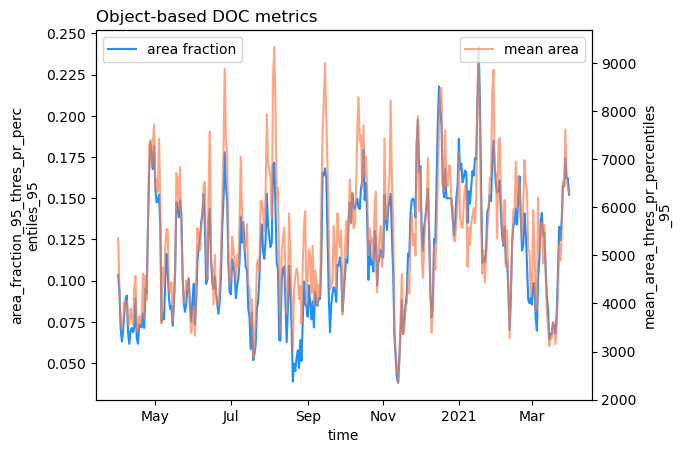

In [88]:
# Time series of metrics
fig, ax = plt.subplots()
area_frac_daily.plot(ax = ax, c = "dodgerblue", label = "area fraction")
ax.legend(loc = 2)
ax2 = ax.twinx()
mean_area_daily.plot(ax = ax2, c = "coral", alpha = 0.7, label = "mean area")
ax2.legend(loc = 1)
ax.set_title(f"Object-based DOC metrics", loc = "left")

Text(0.0, 1.0, 'Object-based DOC metrics')

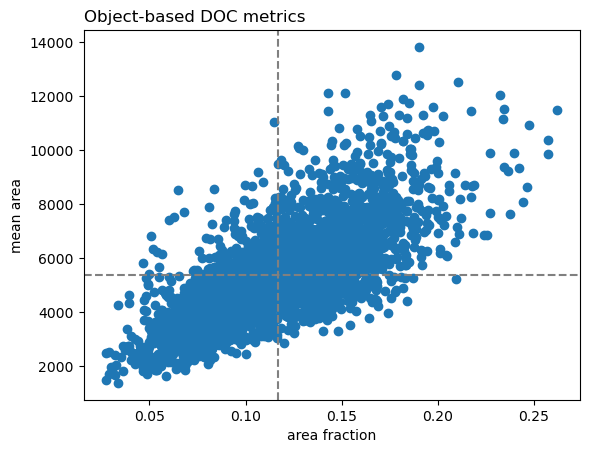

In [89]:
# Scatter plots
fig, ax = plt.subplots()
ax.scatter(area_frac, mean_area)
ax.set_ylabel( "mean area")
ax.set_xlabel( "area fraction")

ax.axhline(y = mean_area_mean, ls = "--", c = "grey")
ax.axvline(x = area_frac_mean, ls = "--", c = "grey")

ax.set_title(f"Object-based DOC metrics", loc = "left")